In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
# Import Important Libraries
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

In [ ]:
# Import Mediapipe libraries
import mediapipe as mp
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [ ]:
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

In [ ]:
# Function to process an image
def draw_landmarks(image_path):
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = hands.process(image_rgb)

  # Draw landmarks
  if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
  return image

In [ ]:
def extract_landmarks(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image_rgb)

    indices_to_extract = [0, 1, 2, 5, 9, 13, 17]
    landmark_names = {
        0: 'wrist',
        1: 'thumb_cmc',
        2: 'thumb_mcp',
        5: 'index_finger_mcp',
        9: 'middle_finger_mcp',
        13: 'ring_finger_mcp',
        17: 'pinky_mcp',
    }
    # indices_to_extract = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    # landmark_names = {
    #       0: 'wrist',
    #       1: 'thumb_cmc',
    #       2: 'thumb_mcp',
    #       3: 'thumb_ip',
    #       4: 'thumb_tip',
    #       5: 'index_finger_mcp',
    #       6: 'index_finger_pip',
    #       7: 'index_finger_dip',
    #       8: 'index_finger_tip',
    #       9: 'middle_finger_mcp',
    #       10: 'middle_finger_pip',
    #       11: 'middle_finger_dip',
    #       12: 'middle_finger_tip',
    #       13: 'ring_finger_mcp',
    #       14: 'ring_finger_pip',
    #       15: 'ring_finger_dip',
    #       16: 'ring_finger_tip',
    #       17: 'pinky_mcp',
    #       18: 'pinky_pip',
    #       19: 'pinky_dip',
    #       20: 'pink_tip'
    # }

    landmarks_data = []
    if results.multi_hand_landmarks:
        num_hands = min(2, len(results.multi_hand_landmarks))  # Maximum 2 hands
        for hand_idx in range(num_hands):
            landmarks = {}
            hand_landmarks = results.multi_hand_landmarks[hand_idx]
            for idx, landmark in enumerate(hand_landmarks.landmark):
                if idx in indices_to_extract:
                    landmark_name = landmark_names[idx]
                    landmarks[f'hand_{hand_idx}_{landmark_name}'] = {
                        'X': landmark.x,
                        'Y': landmark.y,
                        'Z': landmark.z if hasattr(landmark, 'z') else None
                    }
            landmarks_data.append(landmarks)
    return landmarks_data

###**Correct Hand Postures**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
correct_trial1 = '/content/drive/MyDrive/PD Testing/Correct/Trials/TestC_correct11.png'
sample_correct1 = '/content/drive/MyDrive/PD Testing/Correct/Dataset/Dataset 11.jpg'

In [ ]:
test_landmarks = extract_landmarks(correct_trial1)
sample_correct1_landmarks = extract_landmarks(sample_correct1)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Trial 1

In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = correct_trial1_data.append(first_trial1_data)

trial1_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Correct Hand Posture Trial 6 (Test C)")
trial1_data

Correct Hand Posture Trial 6 (Test C)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.359282,0.103095,4.773619e-07,0
1,hand_0_thumb_cmc,0.457159,0.138791,-1.498530e-02,0
2,hand_0_thumb_mcp,0.504276,0.235240,-2.311859e-02,0
3,hand_0_index_finger_mcp,0.432661,0.335076,-5.508072e-02,0
4,hand_0_middle_finger_mcp,0.368492,0.345767,-5.335445e-02,0
5,hand_0_ring_finger_mcp,0.320438,0.337751,-4.922651e-02,0
6,hand_0_pinky_mcp,0.286914,0.318094,-4.367447e-02,0
7,hand_1_wrist,0.792853,0.105354,7.799769e-07,1
8,hand_1_thumb_cmc,0.711012,0.148013,-2.595609e-02,1
9,hand_1_thumb_mcp,0.679809,0.232602,-4.182602e-02,1


Sample Dataset

In [ ]:
sample_correct1_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial1_data = pd.DataFrame(data)
    sample_trial1_data['Hand'] = hand_idx
    sample1_data = sample_correct1_data.append(sample_trial1_data)

sample1_data = pd.concat(sample_correct1_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample1_data

Correct Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.321519,0.112726,5.670540e-07,0
1,hand_0_thumb_cmc,0.407168,0.131587,-1.263351e-02,0
2,hand_0_thumb_mcp,0.452561,0.227279,-2.023674e-02,0
3,hand_0_index_finger_mcp,0.410639,0.363139,-4.488939e-02,0
4,hand_0_middle_finger_mcp,0.355278,0.385973,-4.568652e-02,0
5,hand_0_ring_finger_mcp,0.308328,0.376646,-4.463293e-02,0
6,hand_0_pinky_mcp,0.271118,0.349057,-4.210616e-02,0
7,hand_1_wrist,0.703763,0.070666,6.440824e-07,1
8,hand_1_thumb_cmc,0.625618,0.125849,-2.487311e-02,1
9,hand_1_thumb_mcp,0.593979,0.238404,-3.371927e-02,1


Separate the data by hand

In [ ]:
# Trial 1 (Test Case A)
test_hand0_data = trial1_data[trial1_data['Hand'] == 0]
test_hand1_data = trial1_data[trial1_data['Hand'] == 1]

In [ ]:
# Sample Image from the Dataset
sample_hand0_data = sample1_data[sample1_data['Hand'] == 0]
sample_hand1_data = sample1_data[sample1_data['Hand'] == 1]

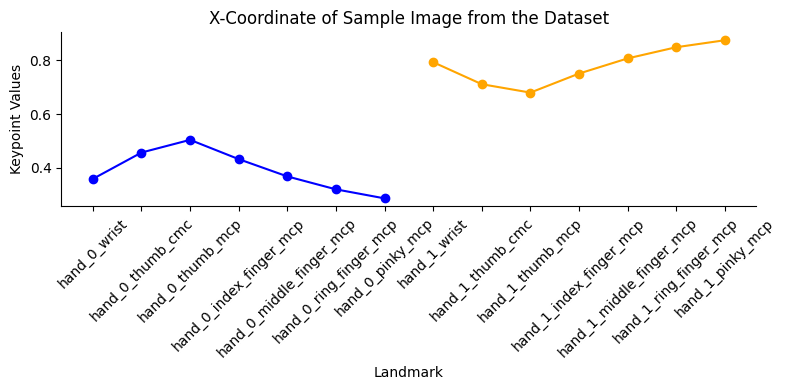

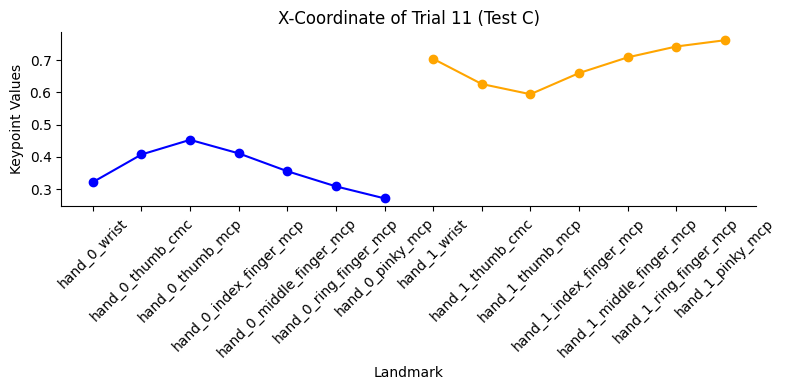

In [ ]:
# @title X-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='blue')
test_hand1_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='orange')
plt.xticks(ticks=range(len(trial1_data['Landmark'])), labels=trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['X'].plot(kind='line', figsize=(8, 4),  marker='o', color='blue')
sample_hand1_data['X'].plot(kind='line', figsize=(8, 4),  marker='o', color='orange')
plt.xticks(ticks=range(len(sample1_data['Landmark'])), labels=sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Trial 11 (Test C)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

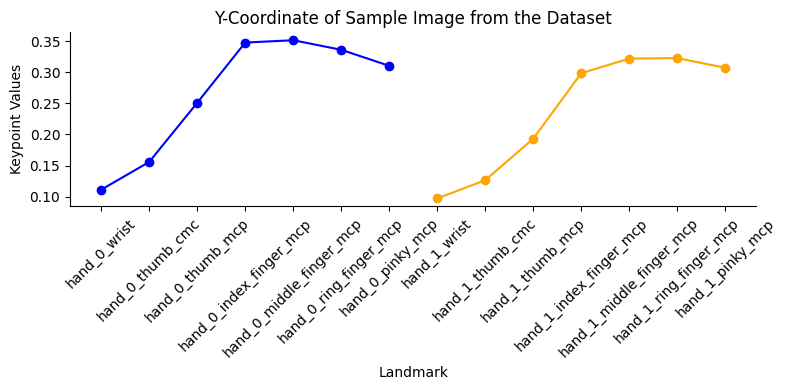

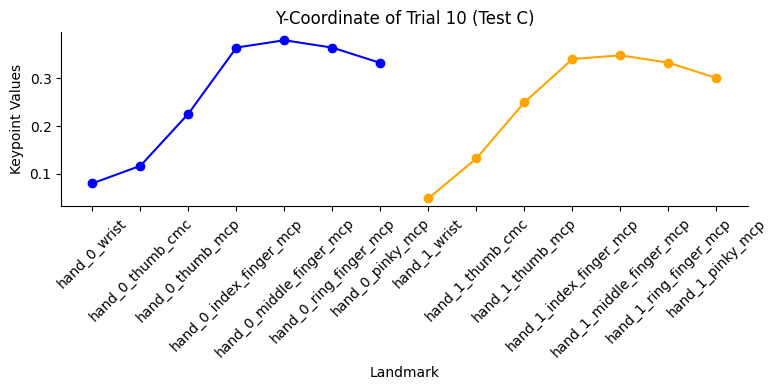

In [ ]:
# @title Y-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Y'].plot(kind='line', figsize=(8, 4), marker='o', label="Left Hand", color='blue')
test_hand1_data['Y'].plot(kind='line', figsize=(8, 4), marker='o', label="Right Hand", color='orange')
plt.xticks(ticks=range(len(trial1_data['Landmark'])), labels=trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Y'].plot(kind='line', figsize=(8, 4), label="Left Hand", marker='o', color='blue')
sample_hand1_data['Y'].plot(kind='line', figsize=(8, 4), label="Right Hand", marker='o', color='orange')
plt.xticks(ticks=range(len(sample1_data['Landmark'])), labels=sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Trial 10 (Test C)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

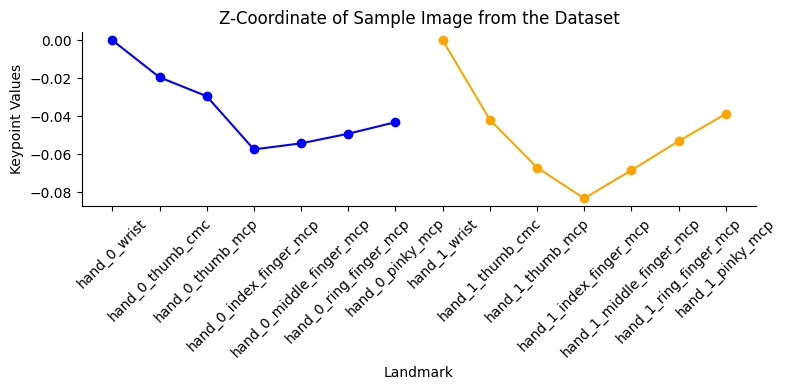

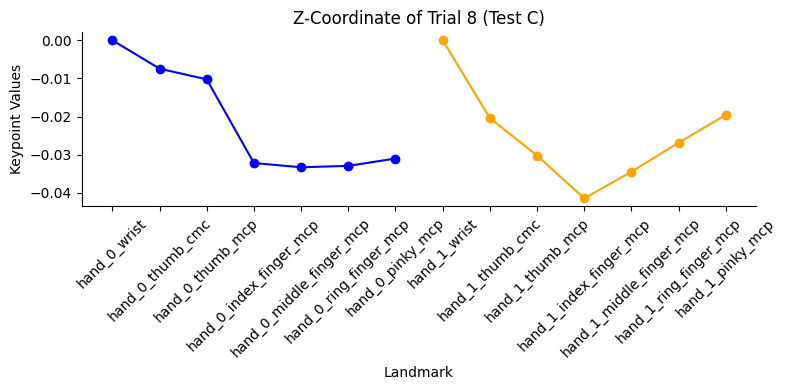

In [ ]:
# @title Z-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Left Hand", color='blue')
test_hand1_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Right Hand", color='orange')
plt.xticks(ticks=range(len(trial1_data['Landmark'])), labels=trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Left Hand", color='blue')
sample_hand1_data['Z'].plot(kind='line', figsize=(8, 4), marker='o', label="Right Hand", color='orange')
plt.xticks(ticks=range(len(sample1_data['Landmark'])), labels=sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Trial 8 (Test C)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

###**Incorrect Hand Postures**

In [ ]:
incorrect_trial1 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Testing/.Incorrect/TestA_incorrect1.png'
sample_incorrect1 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/TestA_incorrect1.png'

In [ ]:
test_inc1_landmarks = extract_landmarks(incorrect_trial1)
sample_incorrect1_landmarks = extract_landmarks(sample_incorrect1)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Trial 1

In [ ]:
import pandas as pd
incorrect_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test_inc1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = incorrect_trial1_data.append(first_trial1_data)

inc_trial1_data = pd.concat(incorrect_trial1_data, ignore_index=True)
print("Incorrect Hand Posture Trial 1 (Test A)")
inc_trial1_data

Incorrect Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.718503,0.630085,1.695447e-07,0
1,hand_0_thumb_cmc,0.626576,0.661043,-3.330264e-03,0
2,hand_0_thumb_mcp,0.555105,0.622200,7.688199e-04,0
3,hand_0_index_finger_mcp,0.565417,0.475941,-2.499922e-02,0
4,hand_0_middle_finger_mcp,0.428322,0.329775,1.824885e-02,0
5,hand_0_ring_finger_mcp,0.644103,0.399652,-4.779731e-03,0
6,hand_0_pinky_mcp,0.680169,0.401150,8.951677e-03,0
7,hand_1_wrist,0.157812,0.674102,6.794560e-07,1
8,hand_1_thumb_cmc,0.236989,0.686853,-2.392724e-02,1
9,hand_1_thumb_mcp,0.302817,0.627904,-3.577305e-02,1


Sample Dataset

In [ ]:
sample_incorrect1_data = []
for hand_idx, hand_landmarks in enumerate(sample_incorrect1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial1_data = pd.DataFrame(data)
    sample_trial1_data['Hand'] = hand_idx
    sample1_data = sample_incorrect1_data.append(sample_trial1_data)

inc_sample1_data = pd.concat(sample_incorrect1_data, ignore_index=True)
print("Incorrect Hand Posture from the Dataset")
inc_sample1_data

Incorrect Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.668926,0.664637,3.132465e-07,0
1,hand_0_thumb_cmc,0.597082,0.691284,-1.175373e-02,0
2,hand_0_thumb_mcp,0.531534,0.663251,-2.917816e-02,0
3,hand_0_index_finger_mcp,0.541996,0.515498,-5.259868e-02,0
4,hand_0_middle_finger_mcp,0.408011,0.375248,-7.087070e-02,0
5,hand_0_ring_finger_mcp,0.617673,0.417696,-5.473869e-02,0
6,hand_0_pinky_mcp,0.652134,0.404753,-5.478007e-02,0
7,hand_1_wrist,0.184503,0.691257,6.374933e-07,1
8,hand_1_thumb_cmc,0.259018,0.706055,-2.754111e-02,1
9,hand_1_thumb_mcp,0.318871,0.653893,-4.475560e-02,1


Separate the data by hand

In [ ]:
# Trial 1 (Test Case A)
test_hand0_data = inc_trial1_data[inc_trial1_data['Hand'] == 0]
test_hand1_data = inc_trial1_data[inc_trial1_data['Hand'] == 1]

In [ ]:
# Sample Image from the Dataset
sample_hand0_data = inc_sample1_data[inc_sample1_data['Hand'] == 0]
sample_hand1_data = inc_sample1_data[inc_sample1_data['Hand'] == 1]

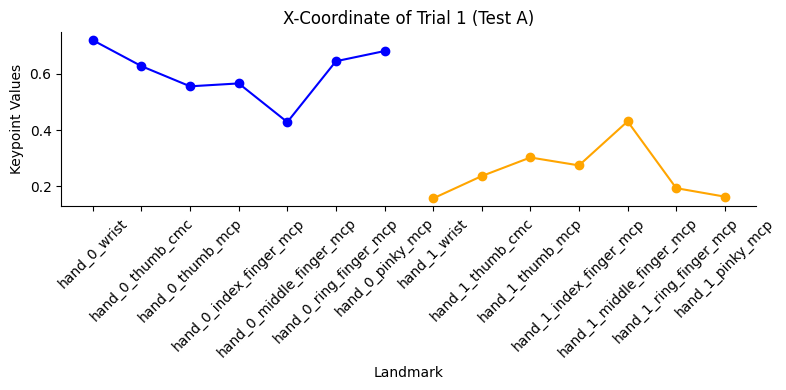

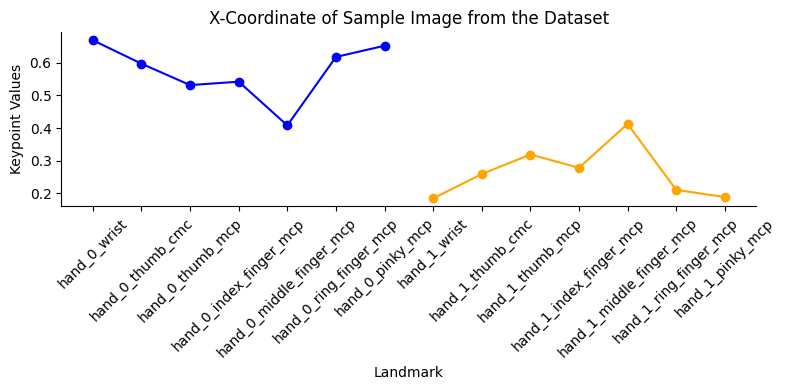

In [ ]:
# @title X-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='blue')
test_hand1_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='orange')
plt.xticks(ticks=range(len(inc_trial1_data['Landmark'])), labels=inc_trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Trial 1 (Test A)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='blue')
sample_hand1_data['X'].plot(kind='line', figsize=(8, 4), marker='o', color='orange')
plt.xticks(ticks=range(len(inc_sample1_data['Landmark'])), labels=inc_sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("X-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

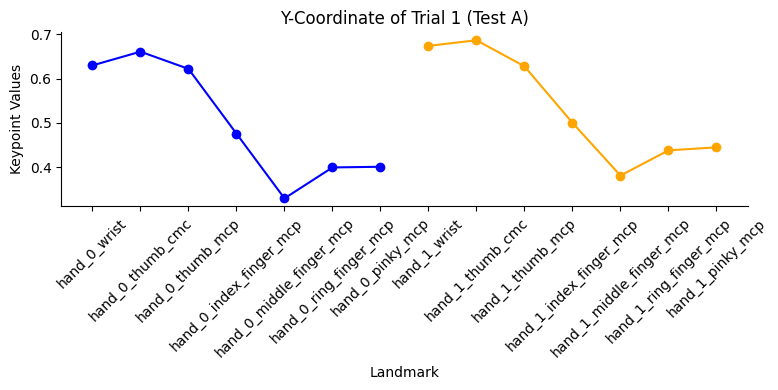

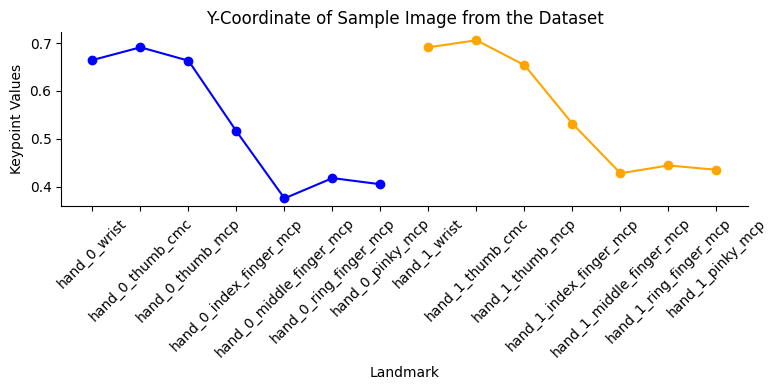

In [ ]:
# @title Y-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='blue')
test_hand1_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_trial1_data['Landmark'])), labels=inc_trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Trial 1 (Test A)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='blue')
sample_hand1_data['Y'].plot(kind='line', figsize=(8, 4), title='Y', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_sample1_data['Landmark'])), labels=inc_sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Y-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

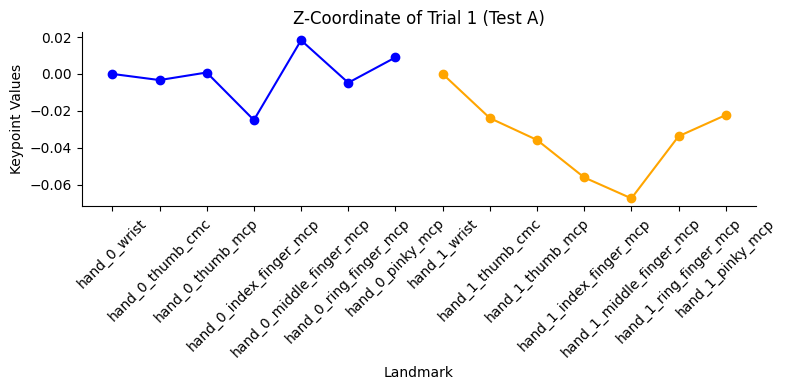

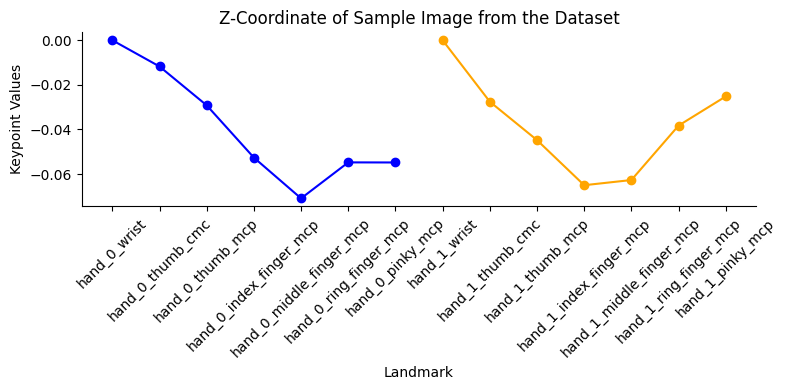

In [ ]:
# @title Z-Coordinate

plt.figure(figsize=(8, 4))
test_hand0_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='blue')
test_hand1_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_trial1_data['Landmark'])), labels=inc_trial1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Trial 1 (Test A)")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sample_hand0_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='blue')
sample_hand1_data['Z'].plot(kind='line', figsize=(8, 4), title='Z', marker='o', color='orange')
plt.xticks(ticks=range(len(inc_sample1_data['Landmark'])), labels=inc_sample1_data['Landmark'], rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Z-Coordinate of Sample Image from the Dataset")
plt.xlabel('Landmark')
plt.ylabel('Keypoint Values')
plt.tight_layout()
plt.show()

#Using Heatmap

##**Correct Hand Posture**

###**Trial 1 Comparison**

Trial 1

In [ ]:
correct_trial1 = '/content/drive/MyDrive/PD Testing/Incorrect/Dataset/Inc 3.jpg'
sample_correct1 = '/content/drive/MyDrive/PD Testing/Incorrect/Dataset/Inc 21.jpg'

In [ ]:
test1_landmarks = extract_landmarks(correct_trial1)
sample_correct1_landmarks = extract_landmarks(sample_correct1)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = correct_trial1_data.append(first_trial1_data)

trial1_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Incorrect Hand Posture Trial 1 (Test C)")
trial1_data

Incorrect Hand Posture Trial 1 (Test C)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.345160,0.081038,3.229679e-07,0
1,hand_0_thumb_cmc,0.428243,0.145909,9.285750e-03,0
2,hand_0_thumb_mcp,0.459609,0.262041,1.417051e-02,0
3,hand_0_index_finger_mcp,0.404215,0.374727,-1.437411e-02,0
4,hand_0_middle_finger_mcp,0.344398,0.377396,-1.837150e-02,0
5,hand_0_ring_finger_mcp,0.298016,0.354426,-1.969613e-02,0
6,hand_0_pinky_mcp,0.265377,0.315781,-1.845297e-02,0
7,hand_1_wrist,0.670505,0.124643,3.367419e-07,1
8,hand_1_thumb_cmc,0.591663,0.198561,-5.669907e-03,1
9,hand_1_thumb_mcp,0.559996,0.313428,-7.391243e-03,1


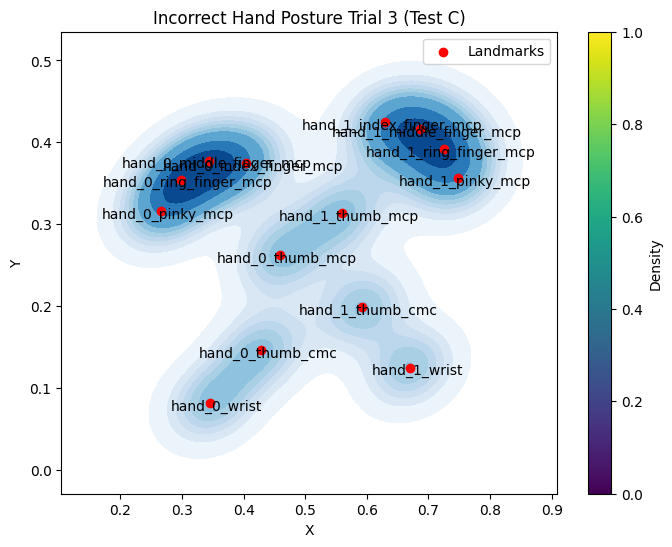

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=trial1_data['X'], y=trial1_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(trial1_data['X'], trial1_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(trial1_data['Landmark']):
    plt.annotate(landmark, (trial1_data['X'][i], trial1_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Incorrect Hand Posture Trial 3 (Test C)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_correct1_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct1_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial1_data = pd.DataFrame(data)
    sample_trial1_data['Hand'] = hand_idx
    sample1_data = sample_correct1_data.append(sample_trial1_data)

sample1_data = pd.concat(sample_correct1_data, ignore_index=True)
print("Incorrect Hand Posture from the Dataset")
sample1_data

Incorrect Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.362283,0.163041,2.912248e-08,0
1,hand_0_thumb_cmc,0.444645,0.241301,2.675554e-02,0
2,hand_0_thumb_mcp,0.488974,0.356595,3.756772e-02,0
3,hand_0_index_finger_mcp,0.439863,0.502092,-1.871314e-02,0
4,hand_0_middle_finger_mcp,0.377044,0.504671,-2.790516e-02,0
5,hand_0_ring_finger_mcp,0.324165,0.480512,-3.183401e-02,0
6,hand_0_pinky_mcp,0.285788,0.433445,-3.204626e-02,0
7,hand_1_wrist,0.701433,0.113835,2.363368e-07,1
8,hand_1_thumb_cmc,0.609063,0.158525,-1.143642e-02,1
9,hand_1_thumb_mcp,0.561115,0.273942,-1.450355e-02,1


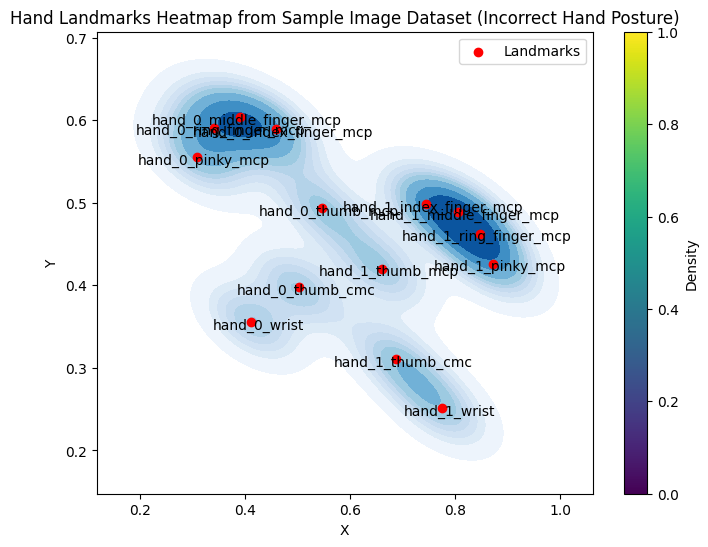

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=sample1_data['X'], y=sample1_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(sample1_data['X'], sample1_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(sample1_data['Landmark']):
    plt.annotate(landmark, (sample1_data['X'][i], sample1_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

###**Trial 2 Comparison**

Trial 2

In [ ]:
correct_trial2 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Testing/.Correct/Correct - Test A/TestA_correct2.png'
sample_correct2 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/Correct/Sample Trial 2 Test A.jpg'

In [ ]:
test_landmarks = extract_landmarks(correct_trial2)
sample_correct2_landmarks = extract_landmarks(sample_correct2)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = correct_trial1_data.append(first_trial1_data)

trial2_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Correct Hand Posture Trial 1 (Test A)")
trial2_data

Correct Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.679193,0.762995,1.802213e-07,0
1,hand_0_thumb_cmc,0.604270,0.724763,6.563610e-04,0
2,hand_0_thumb_mcp,0.568021,0.652996,-3.273834e-03,0
3,hand_0_index_finger_mcp,0.616926,0.582634,-4.456588e-02,0
4,hand_0_middle_finger_mcp,0.665214,0.572065,-3.953501e-02,0
5,hand_0_ring_finger_mcp,0.702160,0.577031,-3.010884e-02,0
6,hand_0_pinky_mcp,0.727019,0.589581,-1.788889e-02,0
7,hand_1_wrist,0.164827,0.754273,6.186135e-07,1
8,hand_1_thumb_cmc,0.227863,0.727524,-2.501698e-02,1
9,hand_1_thumb_mcp,0.265550,0.662460,-3.931094e-02,1


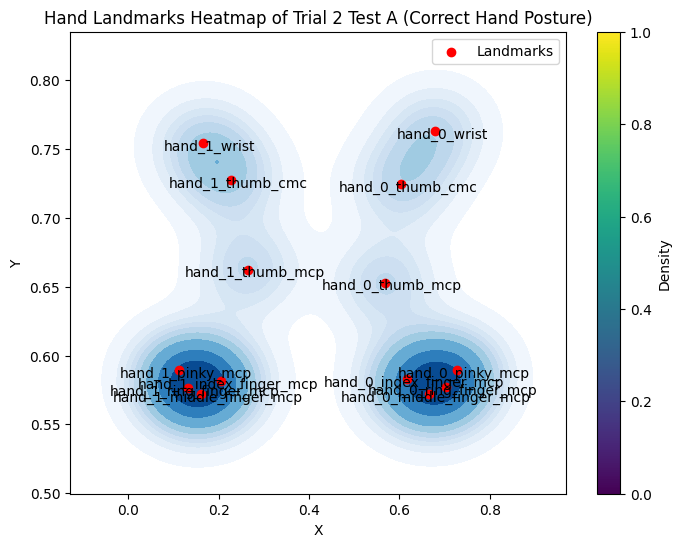

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=trial2_data['X'], y=trial2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(trial2_data['X'], trial2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(trial2_data['Landmark']):
    plt.annotate(landmark, (trial2_data['X'][i], trial2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap of Trial 2 Test A (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_correct2 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/Correct/Sample Trial 2 Test A.jpg'
sample_correct2_landmarks = extract_landmarks(sample_correct2)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
sample_correct2_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial2_data = pd.DataFrame(data)
    sample_trial2_data['Hand'] = hand_idx
    sample1_data = sample_correct2_data.append(sample_trial2_data)

sample2_data = pd.concat(sample_correct2_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample2_data

Correct Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.213088,0.672773,6.947952e-07,0
1,hand_0_thumb_cmc,0.279481,0.636435,-2.762064e-02,0
2,hand_0_thumb_mcp,0.317739,0.546478,-4.695103e-02,0
3,hand_0_index_finger_mcp,0.256363,0.436405,-5.942529e-02,0
4,hand_0_middle_finger_mcp,0.209870,0.424279,-4.688983e-02,0
5,hand_0_ring_finger_mcp,0.176098,0.435203,-3.389678e-02,0
6,hand_0_pinky_mcp,0.154589,0.458798,-2.218331e-02,0
7,hand_1_wrist,0.877890,0.738073,2.188959e-07,1
8,hand_1_thumb_cmc,0.810321,0.679446,-2.060016e-02,1
9,hand_1_thumb_mcp,0.786177,0.578237,-2.366650e-02,1


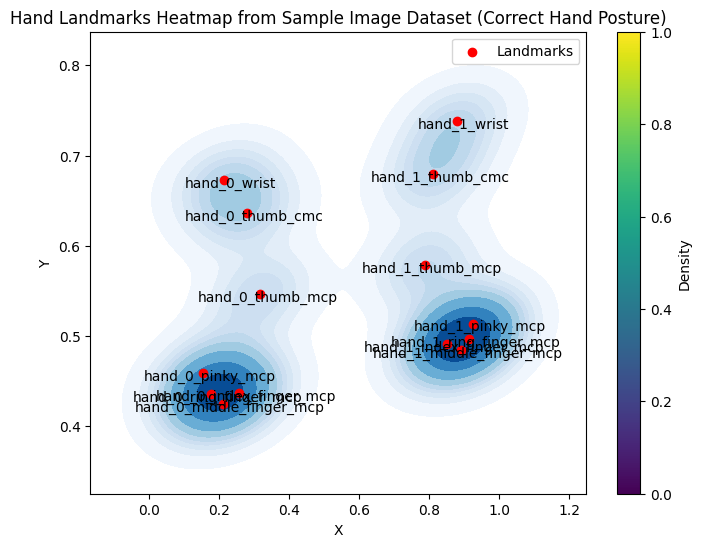

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=sample2_data['X'], y=sample2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(sample2_data['X'], sample2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(sample2_data['Landmark']):
    plt.annotate(landmark, (sample2_data['X'][i], sample2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

###**Trial 3 Comparison**

Trial 2

In [ ]:
correct_trial3 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Testing/.Correct/Correct - Test A/TestA_correct3.png'

In [ ]:
test3_landmarks = extract_landmarks(correct_trial3)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test3_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial1_data = pd.DataFrame(data)
    first_trial1_data['Hand'] = hand_idx
    trial1_data = correct_trial1_data.append(first_trial1_data)

trial3_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Correct Hand Posture Trial 1 (Test A)")
trial3_data

Correct Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.676307,0.830432,2.405729e-07,0
1,hand_0_thumb_cmc,0.599848,0.790560,-3.198766e-03,0
2,hand_0_thumb_mcp,0.558986,0.721578,-1.076031e-02,0
3,hand_0_index_finger_mcp,0.610962,0.655013,-6.038551e-02,0
4,hand_0_middle_finger_mcp,0.661170,0.644070,-5.451412e-02,0
5,hand_0_ring_finger_mcp,0.699132,0.646843,-4.283754e-02,0
6,hand_0_pinky_mcp,0.724690,0.660771,-2.842458e-02,0
7,hand_1_wrist,0.185464,0.756480,7.134397e-07,1
8,hand_1_thumb_cmc,0.248676,0.726676,-2.979412e-02,1
9,hand_1_thumb_mcp,0.287980,0.662972,-4.941232e-02,1


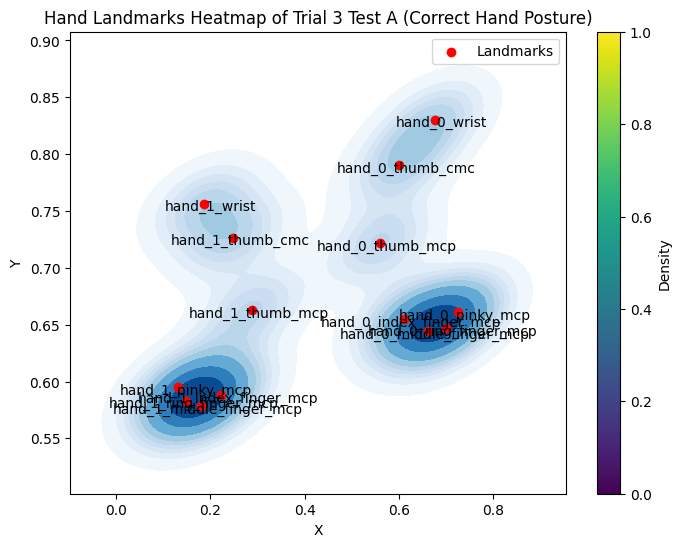

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=trial3_data['X'], y=trial3_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(trial3_data['X'], trial3_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(trial3_data['Landmark']):
    plt.annotate(landmark, (trial3_data['X'][i], trial3_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap of Trial 3 Test A (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_correct2 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/Correct/Sample Trial 2 Test A.jpg'
sample_correct2_landmarks = extract_landmarks(sample_correct2)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
sample_correct2_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial2_data = pd.DataFrame(data)
    sample_trial2_data['Hand'] = hand_idx
    sample1_data = sample_correct2_data.append(sample_trial2_data)

sample2_data = pd.concat(sample_correct2_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample2_data

Correct Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.213088,0.672773,6.947952e-07,0
1,hand_0_thumb_cmc,0.279481,0.636435,-2.762064e-02,0
2,hand_0_thumb_mcp,0.317739,0.546478,-4.695103e-02,0
3,hand_0_index_finger_mcp,0.256363,0.436405,-5.942529e-02,0
4,hand_0_middle_finger_mcp,0.209870,0.424279,-4.688983e-02,0
5,hand_0_ring_finger_mcp,0.176098,0.435203,-3.389678e-02,0
6,hand_0_pinky_mcp,0.154589,0.458798,-2.218331e-02,0
7,hand_1_wrist,0.877890,0.738073,2.188959e-07,1
8,hand_1_thumb_cmc,0.810321,0.679446,-2.060016e-02,1
9,hand_1_thumb_mcp,0.786177,0.578237,-2.366650e-02,1


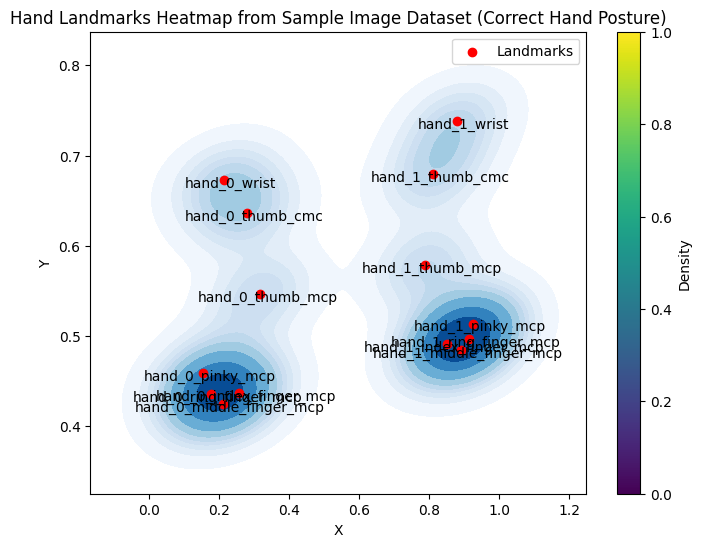

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=sample2_data['X'], y=sample2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(sample2_data['X'], sample2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(sample2_data['Landmark']):
    plt.annotate(landmark, (sample2_data['X'][i], sample2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

###**Trial 4 Comparison**

Trial 4

In [ ]:
correct_trial4 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Testing/.Correct/Correct - Test A/TestA_correct4.png'

In [ ]:
test4_landmarks = extract_landmarks(correct_trial4)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
correct_trial1_data = []
for hand_idx, hand_landmarks in enumerate(test4_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial4_data = pd.DataFrame(data)
    first_trial4_data['Hand'] = hand_idx
    trial4_data = correct_trial1_data.append(first_trial4_data)

trial4_data = pd.concat(correct_trial1_data, ignore_index=True)
print("Correct Hand Posture Trial 1 (Test A)")
trial4_data

Correct Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.663450,0.827478,2.348573e-07,0
1,hand_0_thumb_cmc,0.585810,0.784271,-6.790965e-03,0
2,hand_0_thumb_mcp,0.549336,0.715088,-1.898584e-02,0
3,hand_0_index_finger_mcp,0.598787,0.656731,-8.458706e-02,0
4,hand_0_middle_finger_mcp,0.648506,0.646688,-7.539819e-02,0
5,hand_0_ring_finger_mcp,0.687298,0.650296,-6.036063e-02,0
6,hand_0_pinky_mcp,0.714945,0.661003,-4.205636e-02,0
7,hand_1_wrist,0.195316,0.768596,6.647199e-07,1
8,hand_1_thumb_cmc,0.257025,0.739044,-2.791324e-02,1
9,hand_1_thumb_mcp,0.296713,0.672533,-4.676150e-02,1


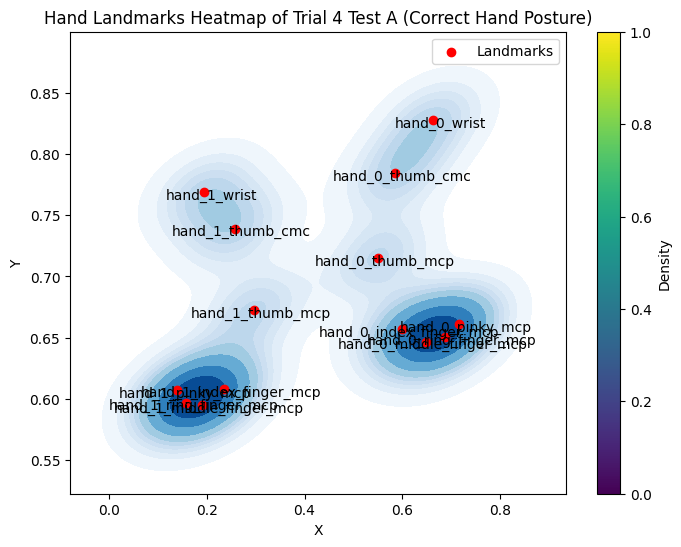

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=trial4_data['X'], y=trial4_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(trial4_data['X'], trial4_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(trial4_data['Landmark']):
    plt.annotate(landmark, (trial4_data['X'][i], trial4_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap of Trial 4 Test A (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_correct4 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/Correct/Sample Trial 3 Test A.jpg'
sample_correct4_landmarks = extract_landmarks(sample_correct4)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
sample_correct4_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct4_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial4_data = pd.DataFrame(data)
    sample_trial4_data['Hand'] = hand_idx
    sample1_data = sample_correct4_data.append(sample_trial4_data)

sample4_data = pd.concat(sample_correct4_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample4_data

Correct Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.213088,0.672773,6.947952e-07,0
1,hand_0_thumb_cmc,0.279481,0.636435,-2.762064e-02,0
2,hand_0_thumb_mcp,0.317739,0.546478,-4.695103e-02,0
3,hand_0_index_finger_mcp,0.256363,0.436405,-5.942529e-02,0
4,hand_0_middle_finger_mcp,0.209870,0.424279,-4.688983e-02,0
5,hand_0_ring_finger_mcp,0.176098,0.435203,-3.389678e-02,0
6,hand_0_pinky_mcp,0.154589,0.458798,-2.218331e-02,0
7,hand_1_wrist,0.877890,0.738073,2.188959e-07,1
8,hand_1_thumb_cmc,0.810321,0.679446,-2.060016e-02,1
9,hand_1_thumb_mcp,0.786177,0.578237,-2.366650e-02,1


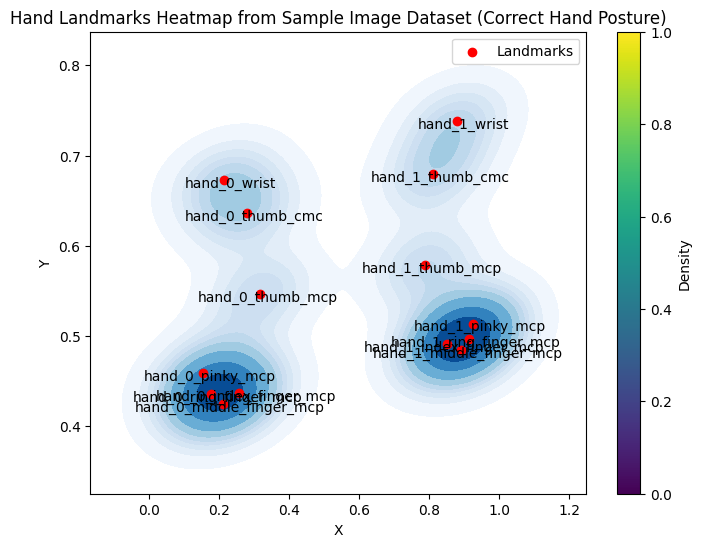

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=sample4_data['X'], y=sample4_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(sample4_data['X'], sample4_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(sample4_data['Landmark']):
    plt.annotate(landmark, (sample4_data['X'][i], sample4_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

###**Trial 5 Comparison**

Trial 5

In [ ]:
correct_trial5 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Testing/.Correct/Correct - Test A/TestA_correct5.png'

In [ ]:
test5_landmarks = extract_landmarks(correct_trial5)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
correct_trial5_data = []
for hand_idx, hand_landmarks in enumerate(test5_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial5_data = pd.DataFrame(data)
    first_trial5_data['Hand'] = hand_idx
    trial5_data = correct_trial5_data.append(first_trial5_data)

trial5_data = pd.concat(correct_trial5_data, ignore_index=True)
print("Correct Hand Posture Trial 1 (Test A)")
trial5_data

Correct Hand Posture Trial 1 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.687851,0.777730,1.962892e-07,0
1,hand_0_thumb_cmc,0.611102,0.728127,8.743430e-04,0
2,hand_0_thumb_mcp,0.571001,0.658909,-5.036752e-03,0
3,hand_0_index_finger_mcp,0.624818,0.585719,-6.296979e-02,0
4,hand_0_middle_finger_mcp,0.675155,0.576753,-5.503973e-02,0
5,hand_0_ring_finger_mcp,0.714104,0.583468,-4.018521e-02,0
6,hand_0_pinky_mcp,0.740242,0.599676,-2.179281e-02,0
7,hand_1_wrist,0.194396,0.782131,6.709955e-07,1
8,hand_1_thumb_cmc,0.256988,0.745774,-2.651170e-02,1
9,hand_1_thumb_mcp,0.296784,0.678560,-4.361794e-02,1


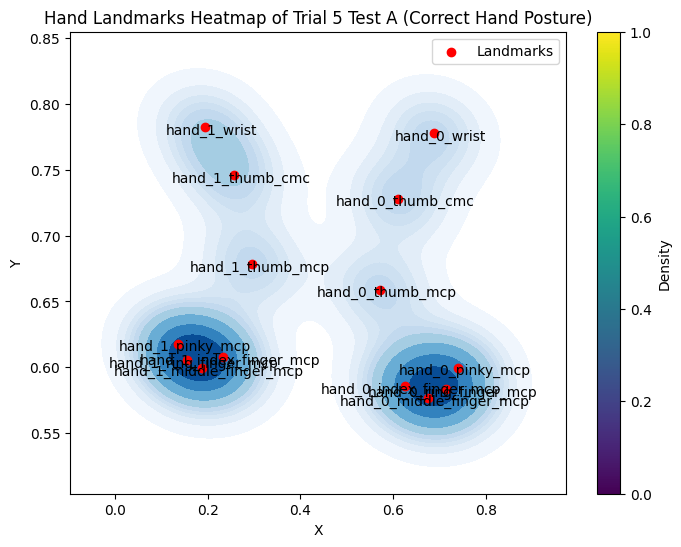

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=trial5_data['X'], y=trial5_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(trial5_data['X'], trial5_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(trial5_data['Landmark']):
    plt.annotate(landmark, (trial5_data['X'][i], trial5_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap of Trial 5 Test A (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_correct5 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/Correct/Sample Trial 5 Test A.jpg'
sample_correct5_landmarks = extract_landmarks(sample_correct5)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
sample_correct5_data = []
for hand_idx, hand_landmarks in enumerate(sample_correct5_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial5_data = pd.DataFrame(data)
    sample_trial5_data['Hand'] = hand_idx
    sample5_data = sample_correct5_data.append(sample_trial5_data)

sample5_data = pd.concat(sample_correct5_data, ignore_index=True)
print("Correct Hand Posture from the Dataset")
sample5_data

Correct Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.201109,0.702877,7.262564e-07,0
1,hand_0_thumb_cmc,0.267417,0.651041,-3.612626e-02,0
2,hand_0_thumb_mcp,0.301353,0.555500,-5.864291e-02,0
3,hand_0_index_finger_mcp,0.234189,0.455420,-6.452411e-02,0
4,hand_0_middle_finger_mcp,0.185736,0.449316,-4.840116e-02,0
5,hand_0_ring_finger_mcp,0.152568,0.463380,-3.255019e-02,0
6,hand_0_pinky_mcp,0.136122,0.488007,-1.810957e-02,0
7,hand_1_wrist,0.883821,0.804162,5.190050e-08,1
8,hand_1_thumb_cmc,0.819853,0.748591,-3.672750e-02,1
9,hand_1_thumb_mcp,0.792413,0.643912,-5.125794e-02,1


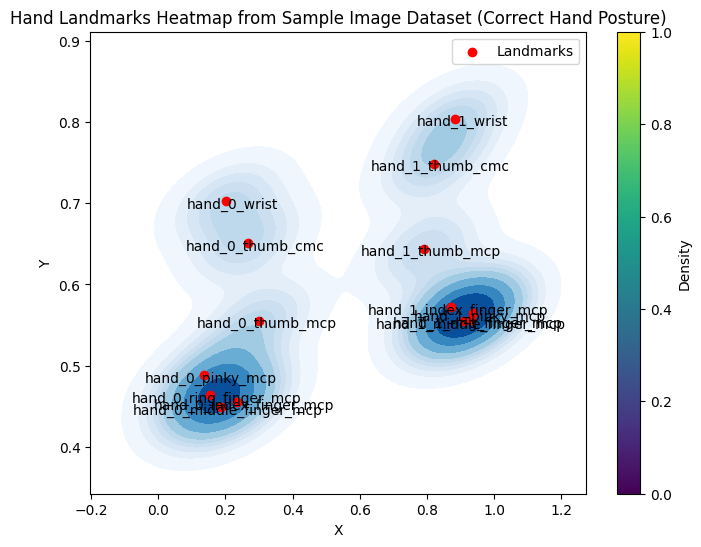

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=sample5_data['X'], y=sample5_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(sample5_data['X'], sample5_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(sample5_data['Landmark']):
    plt.annotate(landmark, (sample5_data['X'][i], sample5_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Correct Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

##**Incorrect**

###**Trial 1 Comparison**

Trial 1

In [ ]:
trial2_inc = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/TestD_incorrect18.png'

In [ ]:
test_inc2_landmarks = extract_landmarks(trial2_inc)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
import pandas as pd
incorrect_trial2_data = []
for hand_idx, hand_landmarks in enumerate(test_inc2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    first_trial2_data = pd.DataFrame(data)
    first_trial2_data['Hand'] = hand_idx
    trial2_data = incorrect_trial2_data.append(first_trial2_data)

inc_trial2_data = pd.concat(incorrect_trial2_data, ignore_index=True)
print("Incorrect Hand Posture Trial 2 (Test A)")
inc_trial2_data

Incorrect Hand Posture Trial 2 (Test A)


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.718503,0.630085,1.695447e-07,0
1,hand_0_thumb_cmc,0.626576,0.661043,-3.330264e-03,0
2,hand_0_thumb_mcp,0.555105,0.622200,7.688199e-04,0
3,hand_0_index_finger_mcp,0.565417,0.475941,-2.499922e-02,0
4,hand_0_middle_finger_mcp,0.428322,0.329775,1.824885e-02,0
5,hand_0_ring_finger_mcp,0.644103,0.399652,-4.779731e-03,0
6,hand_0_pinky_mcp,0.680169,0.401150,8.951677e-03,0
7,hand_1_wrist,0.157812,0.674102,6.794560e-07,1
8,hand_1_thumb_cmc,0.236989,0.686853,-2.392724e-02,1
9,hand_1_thumb_mcp,0.302817,0.627904,-3.577305e-02,1


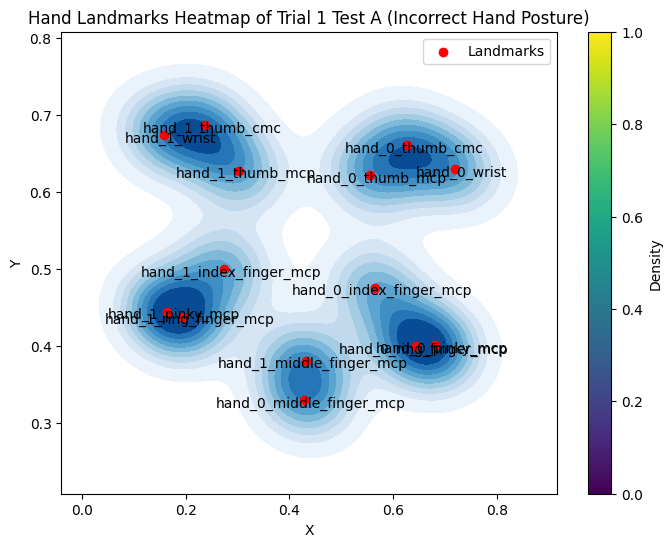

In [ ]:
# XY Coordinates
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=inc_trial2_data['X'], y=inc_trial2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(inc_trial2_data['X'], inc_trial2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(inc_trial2_data['Landmark']):
    plt.annotate(landmark, (inc_trial2_data['X'][i], inc_trial2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap of Trial 1 Test A (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Sample Dataset

In [ ]:
sample_incorrect2 = '/content/drive/MyDrive/TEAM 29 - FINALEST/Modified Hand Postures Dataset/incorrect 4_frame_0043.jpg'
sample_incorrect2_landmarks = extract_landmarks(sample_incorrect2)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [ ]:
sample_incorrect2_data = []
for hand_idx, hand_landmarks in enumerate(sample_incorrect2_landmarks):
    data = {
        'Landmark': list(hand_landmarks.keys()),
        'X': [coords['X'] for coords in hand_landmarks.values()],
        'Y': [coords['Y'] for coords in hand_landmarks.values()],
        'Z': [coords['Z'] for coords in hand_landmarks.values()]
    }
    sample_trial2_data = pd.DataFrame(data)
    sample_trial2_data['Hand'] = hand_idx
    sample2_data = sample_incorrect2_data.append(sample_trial2_data)

inc_sample2_data = pd.concat(sample_incorrect2_data, ignore_index=True)
print("Incorrect Hand Posture from the Dataset")
inc_sample2_data

Incorrect Hand Posture from the Dataset


,Landmark,X,Y,Z,Hand
0,hand_0_wrist,0.668926,0.664637,3.132465e-07,0
1,hand_0_thumb_cmc,0.597082,0.691284,-1.175373e-02,0
2,hand_0_thumb_mcp,0.531534,0.663251,-2.917816e-02,0
3,hand_0_index_finger_mcp,0.541996,0.515498,-5.259868e-02,0
4,hand_0_middle_finger_mcp,0.408011,0.375248,-7.087070e-02,0
5,hand_0_ring_finger_mcp,0.617673,0.417696,-5.473869e-02,0
6,hand_0_pinky_mcp,0.652134,0.404753,-5.478007e-02,0
7,hand_1_wrist,0.184503,0.691257,6.374933e-07,1
8,hand_1_thumb_cmc,0.259018,0.706055,-2.754111e-02,1
9,hand_1_thumb_mcp,0.318871,0.653893,-4.475560e-02,1


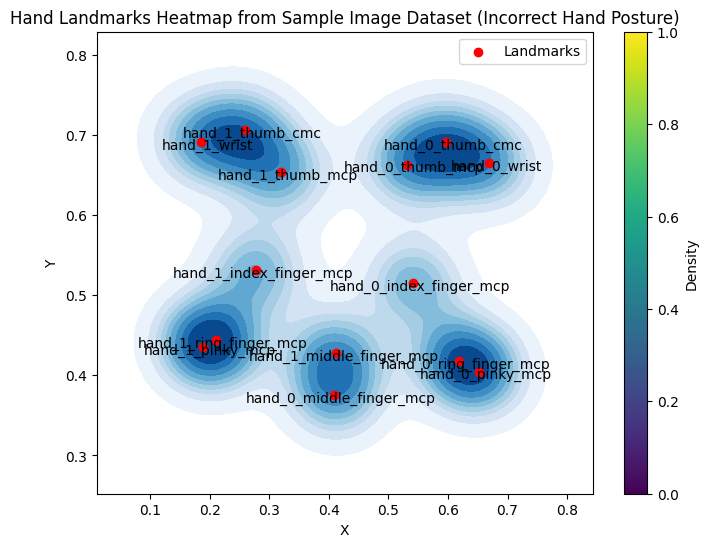

In [ ]:
plt.figure(figsize=(8, 6))
kde = sns.kdeplot(x=inc_sample2_data['X'], y=inc_sample2_data['Y'], fill=True, cmap="Blues", bw_adjust=0.5)
plt.scatter(inc_sample2_data['X'], inc_sample2_data['Y'], color='red', label='Landmarks')

# Annotate points
for i, landmark in enumerate(inc_sample2_data['Landmark']):
    plt.annotate(landmark, (inc_sample2_data['X'][i], inc_sample2_data['Y'][i]), textcoords="offset points", xytext=(5,-5), ha='center')

colorbar = plt.colorbar(kde.collections[0], ax=kde.axes)
colorbar.set_label('Density')

plt.title('Hand Landmarks Heatmap from Sample Image Dataset (Incorrect Hand Posture)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()